In [3]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
# Read UPS.csv
train = pd.read_csv('UPS.csv')
 
# Convert the Date column to datetime type
train['Date'] = pd.to_datetime(train['Date'])

In [4]:
 
# We are now filtering out only store #1 to a new dataframe
# with the required columns
store1_sales = train [['Store','Date', 'Weekly_Sales']]
store1_sales= store1_sales.groupby(["Store","Date"]).sum().reset_index()

In [5]:
# Here we will check and delete if file exists(Predicted 4 weeks sales data)
filename = 'StoreWeeklySales.csv'
import os
if os.path.exists(filename):
    os.remove(filename)
# Opening the file and append the data
f = open(filename, 'a')

forecast = pd.DataFrame()
# Creating a loop to generate weekly sales for each and every store    

for sid in range(45):
    store_s = store1_sales [(store1_sales['Store'] == (sid+1))]
    store_s = store_s [['Date', 'Weekly_Sales']]
    store_s.columns = ['ds', 'y']
    
# Creating a Prophet model to forecast store sales.
    model = Prophet()
    model.fit(store_s)
    future = model.make_future_dataframe(periods=4, freq='w')
    forecast = model.predict(future)
# Writing the predicted Weekly sales data of each store in the file we created.
    data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
    f.write('Store_'+str(sid+1)+'\n')
    data.to_csv(f, header=False, mode = 'a')
    f.write('-----------------------------\n')
  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nithinkakani/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nithinkakani/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nithinkakani/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nithinkakani/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nithinkakani/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nithinkakani/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.

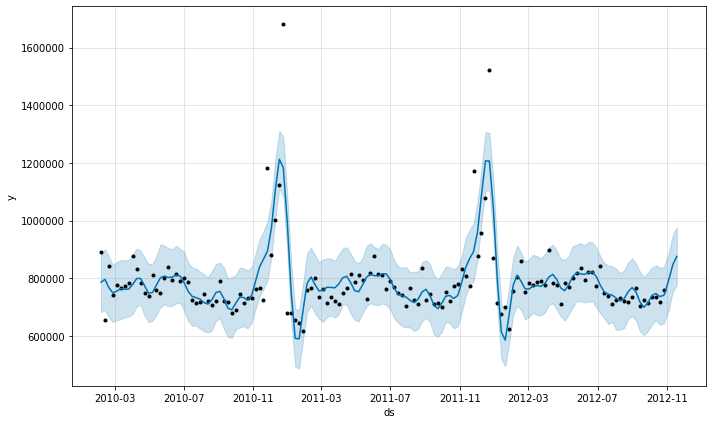

In [4]:
#Sample plot of the predicted 45th store weekly sales.
figure = model.plot(forecast)
plt.show()

In [6]:
#Here we can see the predicted values of our model
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

            ds           yhat     yhat_lower     yhat_upper
142 2012-10-26  740978.583495  641743.429094  841739.387641
143 2012-10-28  748802.735653  651203.813962  846252.806139
144 2012-11-04  796153.450167  697482.882887  895439.501476
145 2012-11-11  847448.793148  746233.355590  951476.099043
146 2012-11-18  875802.840184  780381.256073  975891.908064
